<h1 style="text-align: center">Programming with Python</h1>

## Assessment Exercise: Powder diffraction patterns

The relative integrated intensity of the $hkl$ X-ray reflection by a powdered crystalline sample as a function of angle, $\theta$, may be written
$$
I(\theta) = \frac{p}{V^2}\left[ \frac{1+\cos^2 2\theta}{\sin^2\theta\cos\theta}\right]|F_{hkl}|^2\exp\left(-\frac{2B\sin^2\theta}{\lambda^2}\right), \quad\quad\quad\mathrm{(1)}
$$
where:

* $\theta$ is the _Bragg angle_, given by $2d\sin\theta = \lambda$ for X-ray wavelength $\lambda$ and $hkl$ interplanar spacing, $d$;
* $|F_{hkl}|$ is the magnitude of the structure factor;
* $p$ is the multiplicity of the $hkl$ reflection;
* $V$ is the unit cell volume;
* $B$ is the isotropic temperature factor.

In this exercise we will simulate a powder diffraction pattern. The cell parameters, $a$, $b$, $c$, $\alpha$, $\beta$, $\gamma$, and list of $hkl$ values contributing to the reflections and their multiplicities will be provided. We will assume $B$ is a constant for all reflections.

In [1]:
# Some imports that will prove useful
import numpy as np
import checks

---

### Question 1
Write a function, `calc_V` calculating the volume of the crystal unit cell,
$$
V = abc\sqrt{1 - \cos^2\alpha - \cos^2\beta - \cos^2\gamma + 2\cos\alpha\cos\beta\cos\gamma}
$$


In [2]:
# Simplify the cosine and sine expression first so that the expressions for later variables are clearer and neater.

def co(angle):
    """Function to return the cosine of an angle."""
    
    # Use numpy for the cosine function.
    cosine = np.cos(angle)
    return cosine

def si(angle):
    """Function to return the cosine of an angle."""
    
    # Use numpy for the sine function.
    sine = np.sin(angle)
    return sine

def calc_V(a, b, c, alpha, beta, gamma):
    """Calculate and return the unit cell volume.
    
    a, b, c are the cell edge dimensions
    alpha, beta, gamma are the cell angles in radians.
    
    """

    # Using numpy to get square root and our function from above for cosine.
    V = a*b*c*(np.sqrt(1 - (co(alpha)**2) - (co(beta)**2) - (co(gamma)**2) + 2*co(alpha)*co(beta)*co(gamma)))
    
    return V

Test your code by running the following cell

In [3]:
checks.run_check('check_V', calc_V, hint=True)

**<span style="color: green;">PASSED</span>**

---

### Question 2

The _scattering vector_, $\boldsymbol{q}$, has magnitude
$$
q = \frac{4\pi\sin\theta}{\lambda} = \frac{2\pi}{d}
$$
where the interplanar spacing (the $d$-_spacing_) is given by
$$
\frac{1}{d^2} = \frac{1}{V^2}(S_{11}h^2 + S_{22}k^2 + S_{33}l^2 + 2S_{12}hk + 2S_{23}kl + 2S_{13}{hl}).
$$
In this equation,
$$
\begin{align}
S_{11} &= b^2c^2\sin^2\alpha\\
S_{22} &= a^2c^2\sin^2\beta\\
S_{33} &= a^2b^2\sin^2\gamma\\
S_{12} &= abc^2(\cos\alpha\cos\beta - \cos\gamma)\\
S_{23} &= a^2bc(\cos\beta\cos\gamma - \cos\alpha)\\
S_{13} &= ab^2c(\cos\gamma\cos\alpha - \cos\beta)
\end{align}
$$

Write a function, `calc_q` which returns $|q|$ for a given $hkl$ reflection.

In [19]:
def calc_q(h, k, l):
    """Calculate and return the magnitude of the scattering vector, q.
    
    |q| is calculated for the reflection indexed at (h,k,l).
    The cell parameters: a, b, c, alpha, beta, gamma are to be
    resolved in the containing scope.
    
    """
    # the cell parameters in this scope.
    a, b, c, alpha, beta, gamma
    
    # Calculate all the variables (S variables and V) seperately. 
    S11 = b**2 * c**2 * (si(alpha))**2
    S22 = a**2 * c**2 * (si(beta))**2
    S33 = b**2 * a**2 * (si(gamma))**2
    S12 = a*b* c**2 * (co(alpha)*co(beta) - co(gamma))
    S23 = c*b* a**2 * (co(gamma)*co(beta) - co(alpha))
    S13 = a*c* b**2 * (co(alpha)*co(gamma) - co(beta))
    V = calc_V(a, b, c, alpha, beta, gamma)
    
    # Calcuate 1/d^2 from the equation given.
    recip_d2 = (S11 * h**2 + S22 * k**2 + S33 * l**2 + 2*S12*h*k + 2*S23*k*l + 2*S13*h*l)/(V**2)
    
    # Use 1/d^2 to get q using Braggs Law.
    q = 2*np.pi*np.sqrt(recip_d2)

    return q

Test your code by running the following cell

In [20]:
checks.run_check('check_q', calc_q, hint=True)

**<span style="color: green;">PASSED</span>**

---

The structure factor, $F_{hkl}$, is calculated as
$$
F_{hkl} = \sum_{i=1}^{N} f_i \exp[2\pi i (hx_i + ky_i + lz_i)]
$$
where $N$ is the number of atoms in the unit cell, $(x_i, y_i, z_i)$ is the position of atom $i$, and $f_i$ is the _atomic form factor_ for atom $i$ (which depends on the atom type and the magnitude of the scattering vector, $q$).

The atomic form factor may be described by the formula
$$
f_i(q) = \sum_{j=1}^4 a_j \exp\left[-b_j\left(\frac{q}{4\pi}\right)^2\right] + c,
$$
where $a_j$, $b_j$, and $c$ are coefficients tabulated in the comma-separated file [`form-factors.csv`](form-factors.csv) for 211 atoms and ions and the magnitude of the scattering vector, $q$ is in $\mathrm{nm^{-1}}$.

### Question 3

Write a function which reads in this file to a dictionary, keyed by the the atom or ion symbol as given in the first column. The "value" associated with each key should be a numpy array of the nine coefficients $a_1, b_1, a_2, b_2, a_3, b_3, a_4, b_4, c$

In [6]:
def read_form_factor_coefs():
    """Read in the atomic form factor coefficients from form-factors.csv.
    
    The nine coefficients are returned in a dictionary, keyed by the atom
    or ion symbol.
    
    """

    # Write all the data into an array initially.
    array = np.genfromtxt("form-factors.csv", dtype ='str' ,delimiter=",")
    
    # Set up an empty dictionary.
    coeffs = {}
    
    # Fill the dictionary with keys that are the symbols of the atom and values that are lists of coefficients
    # using a loop to loop over the full array of data.
    for i in range (211):
        coeffs[array[i,0]] = array[i,1:].astype(np.float)
        
    return coeffs

Test your code by running the following cell

In [7]:
checks.run_check('check_f_coefs', read_form_factor_coefs)

**<span style="color: green;">PASSED</span>**

### Question 4

Now write a function, `calc_f` to calculate the atomic form factor for an atom or ion given its symbol and the magnitude of the scattering vector, $q$.


In [8]:
# Read in the coefficients for the atomic form factors
coeffs = read_form_factor_coefs()

def calc_f(symbol, q, coeffs=coeffs):
    """Calculate and return the atomic form factor.
    
    symbol is a string identifying the atom or ion (e.g. 'Zn', 'Mg+2')
    q is the magnitude of the scattering vector in reciprocal nm.
    
    """

    # First get the co-effiecients as a list for the given symbol.
    coeff = coeffs[symbol]
    
    # Set up f = 0 initially.
    f = 0
    
    # Then perform the sum, each time increasing f by the term caluclated. We have to loop over 0 to 7 
    # with gaps of 2 as there are 2 coefficients in each term.
    for i in range(0,7,2):
        f += coeff[i]*(np.exp(-1*coeff[i+1] * ((q/(4*np.pi))**2)))
    
    # Add on final constant term.
    f += coeff[8]
    
    return f



Test your code by running the following cell

In [10]:
checks.run_check('check_form_factor', calc_f, hint=True)


**<span style="color: green;">PASSED</span>**

### Question 5

Write a function, `calc_F`, to calculate the magnitude of the structure factor for an $hkl$ reflection, $|F_{hkl}|$. Assume that the atom positions are provided in a list of $N$ tuples: each tuple represents an atom in the unit cell with the first item that atom's symbol and the second a 3-tuple of that atom's fractional coordinates. For example, the atom positions in zinc blende (ZnS) would be represented by

    atoms = [( 'Zn', (0.25, 0.25, 0.25) ),
             ( 'Zn', (0.75, 0.75, 0.25) ),
             ( 'Zn', (0.75, 0.25, 0.75) ),
             ( 'Zn', (0.25, 0.75, 0.75) ),
             ( 'S', (0.0, 0.0, 0.0) ),
             ( 'S', (0.5, 0.5, 0.0) ),
             ( 'S', (0.5, 0.0, 0.5) ),
             ( 'S', (0.0, 0.5, 0.5) ),
            ]

In [11]:
def calc_absF(hkl, atoms, q=None):
    """Return the magnitude of the structure factor for the hkl reflection.
    
    hkl is a NumPy array of (h, k, l)
    atoms is a list of (atom_symbol, atom_position) tuples where atom_symbol
    identifies the atom or ion and atom_position is its fractional coordinates
    in the unit cell.
    q is the magnitude of the scattering vector for the hkl reflection: if it
    is not provided, it will be calculated.
    
    """
    
    # Calculate a q if none already, using the array of miller indices.
    if q is None:
        q = calc_q(*hkl)
    
    # Use the array of miller indicies to get each one seperatly.
    h = hkl[0]
    k = hkl[1]
    l = hkl[2]
    
    # Similar to before, we are summing up terms so set F = 0 initially.
    F = 0
    
    # Perform the sum using the equation given for each term. 
    for i in range(len(atoms)):
        sym = atoms[i][0]
        F += (calc_f((sym),q))*np.exp(2*np.pi*1j*(h*atoms[i][1][0] + k*atoms[i][1][1] + l*atoms[i][1][2]))

    # Ensure we return an absolute value.
    absF = abs(F)

    return absF

Test your code by running the following cell

In [12]:
checks.run_check('check_structure_factor', calc_absF, hint=True)

**<span style="color: green;">PASSED</span>**

---

### Question 6

Now write a function, `calc_I` to calculate the relative integrated intensity of an X-ray reflection $hkl$ with multiplicity $p$ using equation (1). Take $B = 0$ (that is, ignore temperature effects) and $\lambda = 0.154\;\mathrm{nm}$ (the Cu $\mathrm{K}_\alpha$ line). Your code should return `thetaB`, the Bragg angle corresponding to the $hkl$ reflection, and `I`, the reflected intensity at that angle.

In [13]:
def calc_I(hkl, p, B=0, lam=0.154):
    """Return the Bragg angle and integrated intensity of reflection hkl.
    
    hkl is a NumPy array of (h, k, l)
    p is the multiplicity of the reflection.
    B is the Isotropic temperature factor in nm2.
    lam is the X-ray wavelength in nm.
    
    Returns:
    thetaB: the Bragg angle for the reflection hkl.
    I: the relative integrated intensity of reflection hkl.
    
    """
    # First calculate q, V and the Bragg angle, thetaB, using either previous functions or Braggs Law.
    V = calc_V(a, b, c, alpha, beta, gamma)
    q = calc_q(*hkl)
    thetaB = np.arcsin(lam * q /(4 * np.pi))
    
    # Then convert equation 1 to code to find the intensity, using thetaB above for theta in the equation.
    I = (p/V**2) * ((1 + (co(2*thetaB))**2)/(co(thetaB) * (si(thetaB))**2)) * (calc_absF(hkl, atoms)**2) * np.exp((-2*B*(si(thetaB))**2)/(lam**2))
    
    return thetaB, I

Test your code by running the following cell

In [14]:
checks.run_check('check_intensity_calculation', calc_I, hint=True)

**<span style="color: green;">PASSED</span>**

### Question 7

Now let's simultate a powder diffraction pattern. First execute the cell below to import the crystallographic data relating to the zinc blende structure of ZnS.

In [15]:
from ZnS import cellparams, atoms, reflections
a, b, c, alpha, beta, gamma = cellparams

`reflections` is a list of `( (hkl), p )` tuples where `p` is the multiplicity of the `hkl` reflection. Use your function, `calc_I`, to calculate a list of Bragg angles, `thetaB`, and reflection intensities, `I`. Normalize the intensities so that the maximum intensity is 100.

In [17]:
# First set up empty list to contain all the data.
data = []

# Go through all the relections and convert to a Bragg angle and intensity using our function above
# and add this to the data list.
for i in range (len(reflections)):
    data.append(calc_I(reflections[i][0],reflections[i][1]))
    
# Then seperate the data into seperate lists of bragg angles and intensities.
thetaB = [data[i][0] for i in range(len(data))]
I = [data[i][1] for i in range(len(data))]


# Then normalise list of intensities so max is 100.
max_I = np.amax(I)
I = (I/max_I) * 100


### Plotting the simulated pattern

Run the following code to plot a simulated powder diffraction pattern from the arrays `thetaB` and `I`

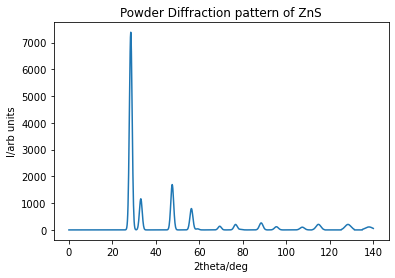

In [18]:
import matplotlib.pyplot as plt

# Some settings to improve the look of the figure: while testing, comment out
# these three lines to speed up the time it takes to render the plot.
from matplotlib import rc


def gaussian(x, x0, sigma):
    """The normalized Gaussian function centred at x0 with standard deviation sigma."""
    
    return np.exp(-((x-x0)/sigma)**2 / 2) / sigma / np.sqrt(2*np.pi)

# Total number of points in the spectrum.
n = 1000
# Maximum theta (radians)
theta_max = np.radians(70)
# The grid of angles, theta, and the grid spacing, dtheta.
theta_grid, dtheta = np.linspace(0, theta_max, n, retstep=True)
# Each reflection is calculated as a Gaussian function out to nwidth
# standard deviations (width, in rad).
width, nwidths = np.pi / 600, 5
# The width of the Gaussian in integer index units
h = int(nwidths * width / dtheta)

spec = np.zeros(n)
for theta, intensity in zip(thetaB, I):
    idx = int(n * theta/theta_max)
    # This reflection's contribution to the spectrum: the width varies with
    # as 1 / cos(theta).
    spec[idx-h:idx+h] += intensity * gaussian(theta_grid[idx-h:idx+h], theta_grid[idx],
                                              width / np.cos(theta))
    
    
# Make and label the plot.
plt.plot(np.degrees(2*theta_grid), spec)
plt.xlabel('2theta/deg')
plt.ylabel('I/arb units')
plt.title('Powder Diffraction pattern of ZnS')
plt.show()